In [14]:
""" Inspired by example from
https://github.com/Vict0rSch/deep_learning/tree/master/keras/recurrent
Uses the TensorFlow backend
The basic idea is to detect anomalies in a time-series.
"""
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from numpy import arange, sin, pi, random

In [ ]:
def dropin(X, y):
    """ The name suggests the inverse of dropout, i.e. adding more samples. See Data Augmentation section at
    http://simaaron.github.io/Estimating-rainfall-from-weather-radar-readings-using-recurrent-neural-networks/
    :param X: Each row is a training sequence
    :param y: Tne target we train and will later predict
    :return: new augmented X, y
    """
    print("X shape:", X.shape)
    print("y shape:", y.shape)
    X_hat = []
    y_hat = []
    for i in range(0, len(X)):
        for j in range(0, np.random.random_integers(0, random_data_dup)):
            X_hat.append(X[i, :])
            y_hat.append(y[i])
    return np.asarray(X_hat), np.asarray(y_hat)

In [ ]:
def z_norm(result):
    result_mean = result.mean()
    result_std = result.std()
    result -= result_mean
    result /= result_std
    return result, result_mean

In [15]:
np.random.seed(1234)

# Global hyper-parameters
sequence_length = 100
random_data_dup = 10  # each sample randomly duplicated between 0 and 9 times, see dropin function
epochs = 1
batch_size = 50

In [16]:
#def run_network(model=None, data=None):
model = None
data = None

global_start_time = time.time()

In [17]:
#def get_split_prep_data(train_start, train_end, test_start, test_end):
""" Generate a synthetic wave by adding up a few sine waves and some noise
:return: the final wave
"""
t = np.arange(0.0, 10.0, 0.01)
wave1 = sin(2 * 2 * pi * t)
noise = random.normal(0, 0.1, len(t))
wave1 = wave1 + noise
print("wave1", len(wave1))

('wave1', 1000)


In [18]:
wave2 = sin(2 * pi * t)
print("wave2", len(wave2))

('wave2', 1000)


In [19]:
t_rider = arange(0.0, 0.5, 0.01)
wave3 = sin(10 * pi * t_rider)
print("wave3", len(wave3))

('wave3', 50)


In [25]:
insert = round(0.8 * len(t))
wave1[int(insert):int(insert) + 50] = wave1[int(insert):int(insert) + 50] + wave3
data = wave1 + wave2
print("Length of Data", len(data))

('Length of Data', 1000)


In [26]:
# train data
print "Creating train data..."

train_start=0
train_end=700
test_start=500
test_end=1000

result = []
for index in range(train_start, train_end - sequence_length):
    result.append(data[index: index + sequence_length])
result = np.array(result)  # shape (samples, sequence_length)
result, result_mean = z_norm(result)

print "Mean of train data : ", result_mean
print "Train data shape  : ", result.shape

train = result[train_start:train_end, :]
np.random.shuffle(train)  # shuffles in-place
X_train = train[:, :-1]
y_train = train[:, -1]
X_train, y_train = dropin(X_train, y_train)

Creating train data...
Mean of train data :  0.00171749842652
Train data shape  :  (600, 100)
('X shape:', (600, 99))
('y shape:', (600,))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: This function is deprecated. Please call randint(0, 10 + 1) instead
  del sys.path[0]


In [27]:
# test data
print "Creating test data..."

result = []
for index in range(test_start, test_end - sequence_length):
    result.append(data[index: index + sequence_length])
result = np.array(result)  # shape (samples, sequence_length)
result, result_mean = z_norm(result)

print "Mean of test data : ", result_mean
print "Test data shape  : ", result.shape

X_test = result[:, :-1]
y_test = result[:, -1]

print("Shape X_train", np.shape(X_train))
print("Shape X_test", np.shape(X_test))

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Creating test data...
Mean of test data :  0.0480435088203
Test data shape  :  (400, 100)
('Shape X_train', (2958, 99))
('Shape X_test', (400, 99))


In [29]:
#def build_model():
model = Sequential()
layers = {'input': 1, 'hidden1': 64, 'hidden2': 256, 'hidden3': 100, 'output': 1}

model.add(LSTM(input_length=sequence_length - 1,input_dim=layers['input'],output_dim=layers['hidden1'],return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(layers['hidden2'],return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(layers['hidden3'],return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(output_dim=layers['output']))
model.add(Activation("linear"))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=64, return_sequences=True, input_shape=(99, 1))`
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  


In [30]:
start = time.time()
model.compile(loss="mse", optimizer="rmsprop")
print "Compilation Time : ", time.time() - start

Compilation Time :  0.115177154541


In [32]:
try:
    print("Training...")
    model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=epochs, validation_split=0.05)
    print("Predicting...")
    predicted = model.predict(X_test)
    print("Reshaping predicted")
    predicted = np.reshape(predicted, (predicted.size,))
except KeyboardInterrupt:
    print("prediction exception")
    print 'Training duration (s) : ', time.time() - global_start_time


Training...


/notebooks/workspace/lib/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 2810 samples, validate on 148 samples
Epoch 1/1
2810/2810 [==============================] - 170s - loss: 0.1706 - val_loss: 0.1106
Predicting...
Reshaping predicted


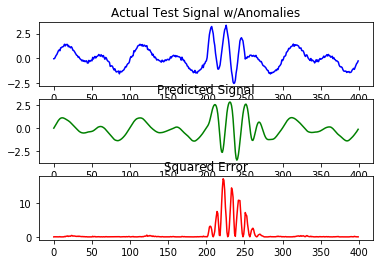

Training duration (s) :  816.371822834


In [33]:
plt.figure(1)
plt.subplot(311)
plt.title("Actual Test Signal w/Anomalies")
plt.plot(y_test[:len(y_test)], 'b')
plt.subplot(312)
plt.title("Predicted Signal")
plt.plot(predicted[:len(y_test)], 'g')
plt.subplot(313)
plt.title("Squared Error")
mse = ((y_test - predicted) ** 2)
plt.plot(mse, 'r')
plt.show()
print 'Training duration (s) : ', time.time() - global_start_time

#    return model, y_test, predicted

In [34]:
exit()